In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import argparse
import numpy as np

In [53]:
parser = argparse.ArgumentParser(description='')
parser.add_argument('--file', '-f', type=list, help='Input file path')
files = ['pmt_measurements_luminous_NNVT.csv']
options = ['-f', files]
args = parser.parse_args(args=options)

plt.style.use('seaborn-v0_8-colorblind')

In [54]:
brand_dict = {"ham": "Hamamatsu", "nnvt" : "NNVT", "NNVT":"NNVT", "HAM": "Hamamatsu"}
markers = ['o', 's', 'v', '^']
colors = ("b", "orange", "g", "r", "c", "m", "y", "k")
ylimits = {
             'N_PE':[0.,300.]
          }

plot_cols = {
    "N_PE" : "Number of PE"
}

# List of values to be log-plotted
logs = [
    'gain',
    "chisqr"
]

# Marker size is a bit small by default
msize = 15
fontsize = 15


In [55]:

fname = args.file[0]

fdt = fname.split("_")[0]

df = pd.read_csv(fname)

# Assumes standarde file naming format
def get_v_from_fname(row):
    base = Path(row["fname"]).stem

    # Get brand model and voltage from filename
    brand, model, voltage, angle = base.split("_")
    brand = brand_dict[brand]
    # Get rid of "v" in string if there
    if voltage[-1] == "V":
        voltage = voltage[:-1]
    
    az_angle = int(angle[2:5])
    pol_angle = int(angle[8:10])

    az_angle_joint = az_angle
    pol_angle_joint = pol_angle
    if az_angle >= 180:
        az_angle_joint = az_angle - 180
        pol_angle_joint = -pol_angle
    return brand, model, float(voltage), az_angle, pol_angle, az_angle_joint, pol_angle_joint

# Expand here means when apply returns multiple values, they get assigned to
# each given new column
df[["brand","model","v", "az_angle", "pol_angle", "az_angle_joint", "pol_angle_joint"]] = df.apply(get_v_from_fname, axis="columns", result_type="expand")

# Sort values by angles is in order
df = df.sort_values(["az_angle_joint","pol_angle_joint"], ascending=True)
#df = df.set_index("az_angle")

key N_PE
value Number of PE
0
key N_PE
[20.36106126372945, 119.08299152768375, 268.02329096345113, 219.44264912611717, 217.5654149032192, 205.56227534204584, 190.58987853259697, 200.28497227101772, 172.17035093059053, 179.83248894107976, 151.42116801975973, 145.9664742046671, 146.99925734183853, 36.726489020007776]
[6.392203052277536, 18.486350976046598, 30.767193342424093, 26.800942217424055, 26.152458771870883, 25.348361620318272, 23.997319627674592, 24.8999024384159, 22.80666195897254, 23.435079481818075, 21.84192635298198, 22.11656748392899, 23.531126416288927, 8.539163114573169]
pmt PN23051100
30
key N_PE
[19.32746565091993, 177.12340604446786, 226.0410847678226, 221.7086485698997, 220.21719812144877, 194.6262933273776, 189.69391904998358, 181.55978889454948]
[5.978493875600876, 23.72780378157014, 27.4966730407635, 26.29825771433496, 26.013582331636332, 24.334580989403644, 24.01850286651874, 26.753708816573134]
pmt PN23051100
90
key N_PE
[48.232119580000365, 124.77560763921134, 13

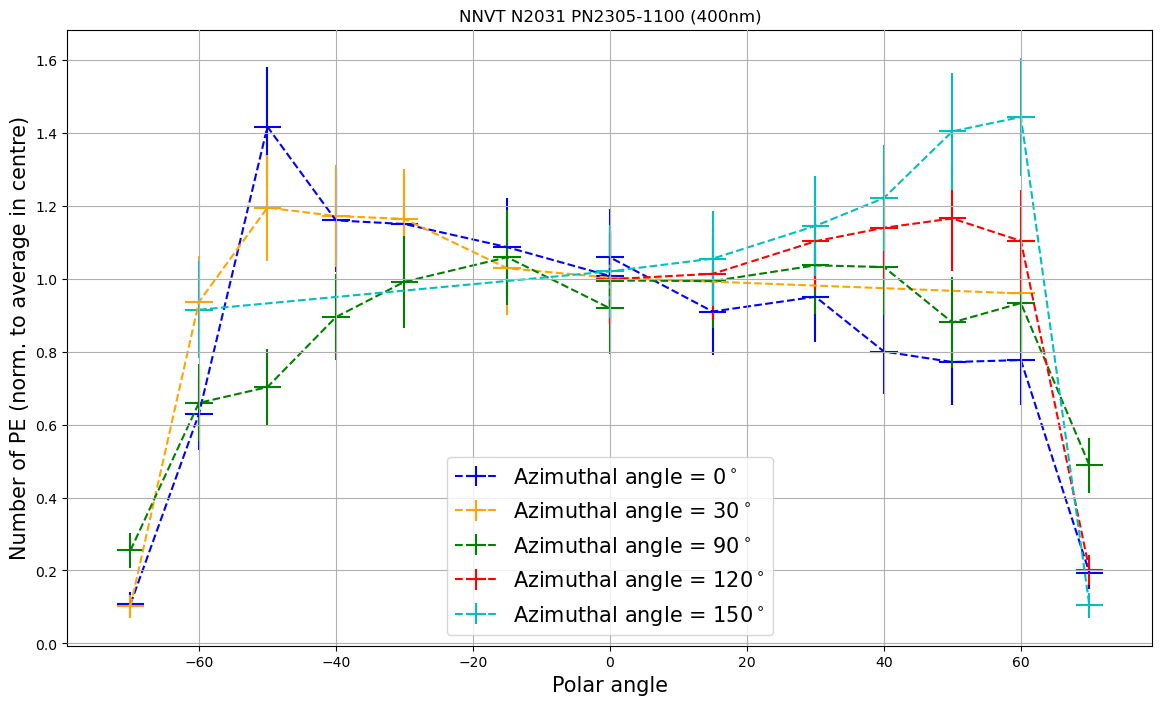

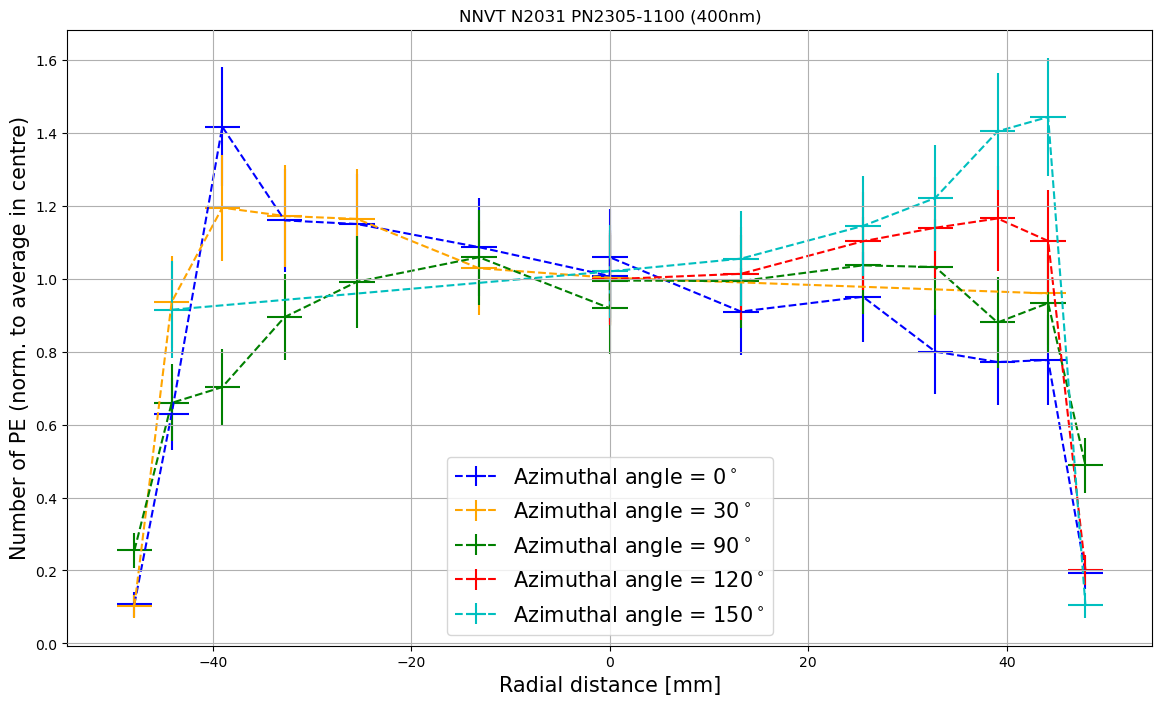

In [56]:
# Make the 1D distribution plots
'''
# Get the NNVT measurements if given
if len(args.file) > 1:
    nnvt_fname = args.file[1]
    nnvt_df = pd.read_csv(nnvt_fname)

    # Only get the same models for direct comparison
    nnvt_df = pd.merge(nnvt_df, df["model"].drop_duplicates())
    # Add clarification in label
    nnvt_df["model"] = nnvt_df["model"].apply(lambda x: x + " (NNVT)")
    nnvt_df = nnvt_df.sort_values(["v","model"], ascending=True)
    nnvt_df = nnvt_df.set_index("v")

    # Given in units of 1e7
    nnvt_df["gain"] *= 1e7
    nnvt_df_group = nnvt_df.groupby("model")
'''
key = "N_PE"
value = "Number of PE"
print('key', key)
print('value', value)
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

# Group by the azimuthal angle and plot each value
df_az_joint = df.groupby("az_angle_joint")

# Cycle through grouped df plotting each azimuthal angle
idx=0
for az,df_az in df_az_joint:
    print(az)
    if type(df_az[key].values[0]) != str:
        val =  [float(str_v) for str_v in df_az[key].values]
        err = [float(str_v) for str_v in df_az['sigma[NPE]'].values]
    #elif '(' in df_pmt[key].values:
    else:
        val = [ str_v.replace('(', '').replace(')','').split(',')[0] for str_v in df_az[key].values ]
        err = [ str_v.replace('(', '').replace(')','').split(',')[0] for str_v in df_az['sigma[NPE]'].values ]
        val = [float(i) for i in val]
        err = [float(i) for i in err]
        
    print('key',key)
    print(val)
    print(err)
    #print('max', np.max(val))
    
    # Set the style based on PMT
    pmt = df_az["model"].values[0]
    print('pmt',pmt)
    if 'KM' in pmt:
        marker = markers[0]
        linestyle = '-'
    elif 'PN' in pmt:
        marker = markers[1]
        linestyle = ':'
        if 'PN23' in pmt:
            marker = markers[2]
            linestyle = '--'
        if '(NNVT)' in pmt:
            marker = markers[3]
            linestyle = ':'
    color=colors[idx]
    format_str = "{color}{marker}-".format(color=color, marker=marker)
    #ax.plot(df_pmt[key], format_str, label=pmt)
    #ax.plot(df_pmt['polAngle'].values, val, label='Azimuthal angle = %.0f'%df_pmt.index.values[0].astype(float), color=color, linestyle=linestyle)

    #Average response in the centre is
    normVal = 189.22
    relerr = np.array(err) / np.array(val)
    val = [v / normVal for v in val]

    '''
    if(len(val)<8):
        if(df_az['pol_angle_joint'].values[0]>-10):
            val = [ v / val[0] for v in val]
        else:
            val = [ v / val[6] for v in val]
    else:
        normVal1 = val[6]
        normVal2 = val[7]
        for i in range(len(val)):
            if i<7:
                val[i] = val[i] / normVal1
            else:
                val[i] = val[i] / normVal2
    '''
    err = relerr * np.array(val)
    
    ax.errorbar(df_az['pol_angle_joint'].values, y=val, yerr = err, xerr = 2, label=r'Azimuthal angle = $%.0f^\circ$'%az, color=color, linestyle=linestyle)
    radius = 51*np.cos(np.pi*(90-df_az['pol_angle_joint'].values)/180)
    ax2.errorbar(radius, y=val, yerr = err, xerr = 51*np.cos(np.pi*(44/90)), label=r'Azimuthal angle = $%.0f^\circ$'%az, color=color, linestyle=linestyle)

    idx+=1
    
if len(args.file) > 1:
    try:
        # Same for NNVT df, if it has the info
        #idx = 0
        for pmt,df_pmt in nnvt_df_group:
            if 'KM' in pmt:
                marker = markers[0]
                linestyle = '-'
            elif 'PN' in pmt:
                marker = markers[1]
                linestyle = ':'
                if 'PN23' in pmt:
                    marker = markers[2]
                    linestyle = '--'
                if '(NNVT)' in pmt:
                    marker = markers[3]
                    linestyle = ':'
            color=colors[idx]
            format_str = "{color}{marker}-".format(color=color, marker=marker)
            ax.plot(df_pmt[key], format_str, label=pmt, linestyle=linestyle)
            idx +=1
    except:
        print(f"{key} not in NNVT data. Won't plot")

    # Log it if set to
if key in logs:
    ax.set_yscale("log")

ax.legend(fontsize=fontsize)
ax.set_xlabel("Polar angle",fontsize=fontsize)
ax.set_ylabel("Number of PE (norm. to average in centre)", fontsize=fontsize)
#ax.set_ylim(ylimits[key])
ax.grid("True")
ax.title.set_text("NNVT N2031 PN2305-1100 (400nm)")
fig.set_size_inches(14,8)
fig.savefig("AngularDependence_Angles_NNVT.png",bbox_inches='tight')

ax2.legend(fontsize=fontsize)
ax2.set_xlabel("Radial distance [mm]",fontsize=fontsize)
ax2.set_ylabel("Number of PE (norm. to average in centre)", fontsize=fontsize)
#ax2.set_ylim(ylimits[key])
ax2.grid("True")
ax2.title.set_text("NNVT N2031 PN2305-1100 (400nm)")
fig2.set_size_inches(14,8)
fig2.savefig("AngularDependece_Radius_NNVT.png",bbox_inches='tight')

plt.show()


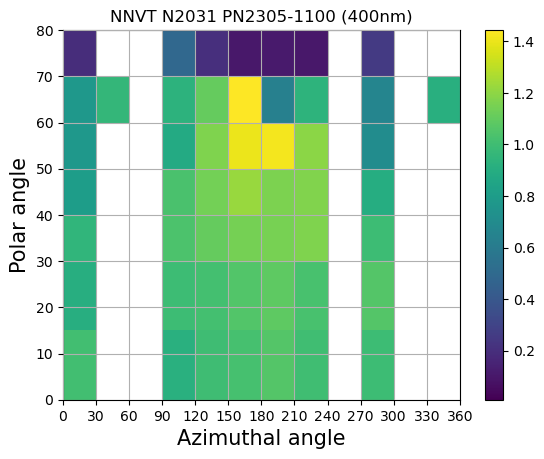

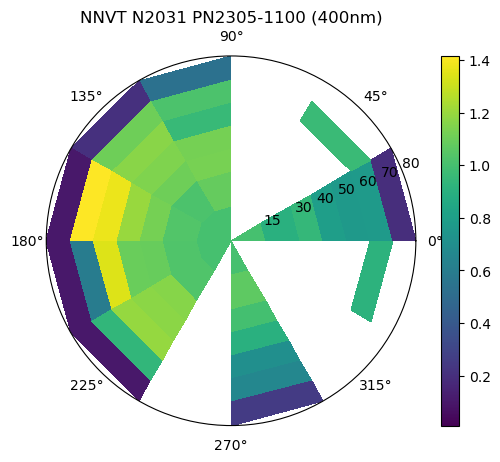

In [58]:
# Draw a polar 2D histogram
# define binning in radians
rbins = [0,15,30,40,50,60,70,80]
abins_deg = np.linspace(0, 360, 13)
abins_rad = np.linspace(0, 2*np.pi, 13)

azim_deg = df["az_angle"].values
azim_rad = [(val)*np.pi/180 for val in azim_deg]
zenith = df["pol_angle"].values

PE = [ str_v.replace('(', '').replace(')','').split(',')[0] for str_v in df["N_PE"].values ]
PE = [float(i) for i in PE]
PE = [val / normVal for val in PE] # normalize values

my_cmap = plt.cm.viridis
my_cmap.set_under('w',0.01)

#calculate histogram
hist, bins_x, bins_y = np.histogram2d(azim_deg, zenith, bins=(abins_deg, rbins),weights=PE)
A, R = np.meshgrid(bins_x, bins_y)

#normalize histogram
'''
for i,row in enumerate(hist):
  if row[0]>0:
    row = [val/row[0] for val in row]
  hist[i] = row
'''

plt.rcParams["axes.axisbelow"] = False
# plot
fig_2d, ax_2d = plt.subplots()
pc_2d = ax_2d.pcolormesh(A, R, hist.T, cmap=my_cmap, vmin = 0.01)
fig_2d.colorbar(pc_2d)
ax_2d.set_xlabel("Azimuthal angle",fontsize=fontsize)
ax_2d.set_ylabel("Polar angle", fontsize=fontsize)
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])
ax_2d.grid()
ax_2d.title.set_text("NNVT N2031 PN2305-1100 (400nm)")
ax_2d.plot()
fig_2d.savefig("AngularDependence_2DHistogram_NNVT.png",bbox_inches='tight')

# Radial plot
hist, bins_x, bins_y = np.histogram2d(azim_rad, zenith, bins=(abins_rad, rbins),weights=PE)
A, R = np.meshgrid(bins_x, bins_y)
#normalize histogram
for i,row in enumerate(hist):
  if row[0]>0:
    row = [val/row[0] for val in row]
  hist[i] = row
fig_pol, ax_pol = plt.subplots(subplot_kw=dict(projection="polar"))
ax_pol.set_rticks([15,30,40,50,60,70,80]) 
#plt.setp()
pc_pol = ax_pol.pcolormesh(A, R, hist.T, cmap=my_cmap, vmin=0.01)
fig_pol.colorbar(pc_pol)
ax_pol.grid(False)
ax_pol.title.set_text("NNVT N2031 PN2305-1100 (400nm)")
fig_pol.savefig("AngularDependence_Radial_NNVT.png",bbox_inches='tight')

plt.show()